# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


Il principio variazionale in meccanica quantistica afferma che il valore di aspettazione dell'hamiltoniana su un buono stato di prova, ha il ground state (stato ad energia minore) come limite inferiore: $$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
In questa esercitazione considereremo una particella quantistica in una dimensione, la cui hamiltoniana è la seguente: $$H=\frac{p^2}{2m}+x^4-\frac{5}{2}x$$
L'obiettivo è quello di ottenere una funzione d'onda approssimata per il ground state tramite metodi Monte Carlo variazionali. Questo metodo utilizza una funzione d'onda di prova, descritta da due parametri, $\mu$ e $\sigma$: $$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
Questa è la sovrapposizione di due gaussiane, una centrata in $\mu$ e l'altra in $-\mu$, entrambe di larghezza $\sigma$.

### Simulated Annealing
Il metodo del Simulated Annealing funziona grazie al principio per il quale per sistemi che vengono raffreddati lentamente, la natura è in grado di trovare lo stato ad energia minima. Ogni problema di ottimizzazione può essere trasformato in un problema di annealing, interpretando la funzione costo come l'energia del sistema, e considerando la distribuzione di Boltzmann: $$p(x)=\frac{e^{-\beta L(x)}}{Z}$$
Dove $L(x)$ è la funzione costo. Nel limite in cui $\beta\rightarrow\infty$, la distrubuzione si concentra nel minimo di $L(x)$. I metodi Monte Carlo ci forniscono una tecnica generale per campionare la distribuzione di Boltzmann, e l'idea del simulated annealing è quella di usarli facendo variare $\beta$ nel tempo. Si fanno quindi un certo numero di step a ogni $T=\frac{1}{\beta}$, e la configurazione finale di ogni temperatura sarà l'iniziale della temperatura successiva. La probabilità che andremo a campionare sarà quindi la seguente: $$P(x)=e^{-\beta(L(\vec{x}')-L(\vec{x}))}$$

### Exercise 08.1

In questo esercizio abbiamo scritto un algoritmo di Metropolis per campionare il modulo quadro della funzione d'onda di una particella $1D$, utilizzando una probabilità di transizione uniforme $T(x_{new}|x_{old})$. Usando il data blocking abbiamo poi calcolato il valore di aspettazione dell'hamiltoniana, quindi l'energia. Abbiamo usato come unità di misura quelle naturali, quindi $\hbar=1$ e $m=1$. Il valor medio dell'hamiltoniana è il seguente: $$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
Per misurare il valor medio dell'hamiltoniana è stato necessario calcolare la seguente derivata: $$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2
In questo esercizio troveremo i parametri $\mu$ e $\sigma$ che minimizzano $\langle H\rangle_T$, in modo  da trovare la funzione d'onda del ground state. Per farlo siamo partiti da una temperatura di $T_0=2$, e l'abbiamo fatta evolvere con la seguente legge: $$T=T_0\cdot c^{t}$$
Dove $c$ è il cooling rate, che vale $c=0.9$, mentre $t$ è lo step. Infatti il codice aumenta la variabile $t$ di uno per ogni ciclo del simulated annealing, finchè la temperatura $T$ non scende sotto la soglia minima di $0.01$. In questo modo il sistema si sta raffreddando lentamente, e quindi non rischiamo di evitare il minimo globale. All'interno del ciclo della temperatura c'è il ciclo del simulated annealing, di $1500$ step, in cui vengono mossi $\mu$ e $\sigma$.

Nei grafici dellla cella sottostante è possibile vedere per $3$ delle temperature l'energia in funzione degli step, che, come ci aspettiamo, si abbassa man mano che la temperatura decresce. E' inoltre presente il grafico dell'energia finale calcolata con i parametri $\mu$ e $\sigma$ che sono stati ricavati dal simulated annealing, e come ultimo è presente l'istogramma del campionameto della funzione d'onda paragonato con la curva analitica.

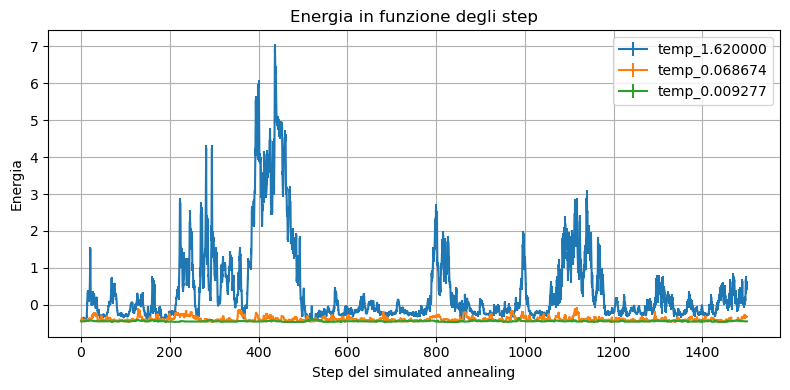

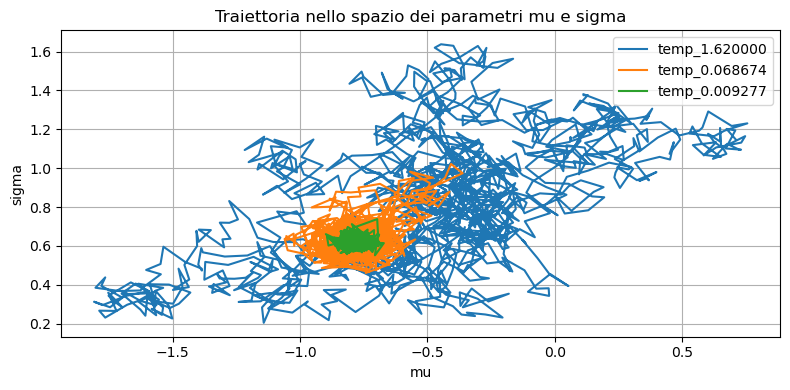

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Lista dei nomi dei file
filenames = ['temp_1.620000.dat', 'temp_0.068674.dat', 'temp_0.009277.dat']

# Inizializzazione delle liste per i dati
x_data = []
mu_data = []
sigma_data = []
energy_data = []
error_data = []

# Lettura dei dati dai file
for filename in filenames:
    x = []
    mu = []
    sigma = []
    energy = []
    error = []
    with open(filename, 'r') as file:
        num_data = 0  # Contatore dei dati nel file
        for line in file:
            if not line.startswith('#'):  # Salta le righe che iniziano con #
                num_data += 1  # Incrementa il contatore dei dati
                data = line.strip().split()
                mu.append(float(data[0]))
                sigma.append(float(data[1]))
                energy.append(float(data[2]))  
                error.append(float(data[3]))  
        x = np.arange(1, num_data + 1)  # Numeri di dati nel file
    x_data.append(x)
    mu_data.append(mu)
    sigma_data.append(sigma)
    energy_data.append(energy)
    error_data.append(error)

# Creazione del grafico
plt.figure(figsize=(8, 4))

# Plot dei dati
for i in range(len(filenames)):
    label = os.path.splitext(filenames[i])[0]
    plt.errorbar(x_data[i], energy_data[i], yerr=error_data[i], label=label)

# Personalizzazione del grafico
plt.xlabel('Step del simulated annealing')
plt.ylabel('Energia')
plt.title('Energia in funzione degli step')
plt.legend()  # Mostra la leggenda con i titoli dei file

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()

# Creazione del grafico
plt.figure(figsize=(8, 4))

# Plot dei dati
for i in range(len(filenames)):
    label = os.path.splitext(filenames[i])[0]
    plt.plot(mu_data[i], sigma_data[i], label=label)

# Personalizzazione del grafico
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Traiettoria nello spazio dei parametri mu e sigma')
plt.legend()  # Mostra la leggenda con i titoli dei file

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()


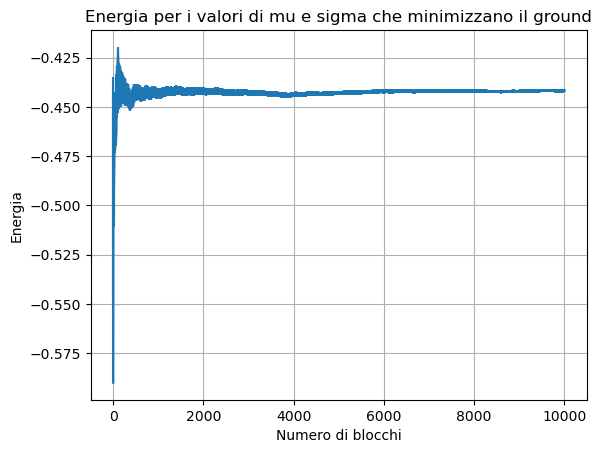

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    # Inizializza due liste vuote per memorizzare i dati
    energia = []
    errore = []

    # Apre il file e legge i dati riga per riga
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        for line in file:
            # Salta le righe che iniziano con #
            if line.strip().startswith('#'):
                continue
            # Divide ogni riga in due numeri e li aggiunge alle rispettive liste
            values = line.split()
            energia.append(float(values[0]))
            errore.append(float(values[1]))
    
    # Genera la lista n come indice per le righe lette
    n = list(range(1, len(energia) + 1))
            
    return n, energia, errore

# Chiamata alla funzione per leggere i dati dal file
n, energia, errore = read_data_from_file("optimized_energy.dat")
plt.errorbar(n, np.array(energia), yerr=np.array(errore))
plt.title('Energia per i valori di mu e sigma che minimizzano il ground')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia')
plt.grid(True)
plt.show()


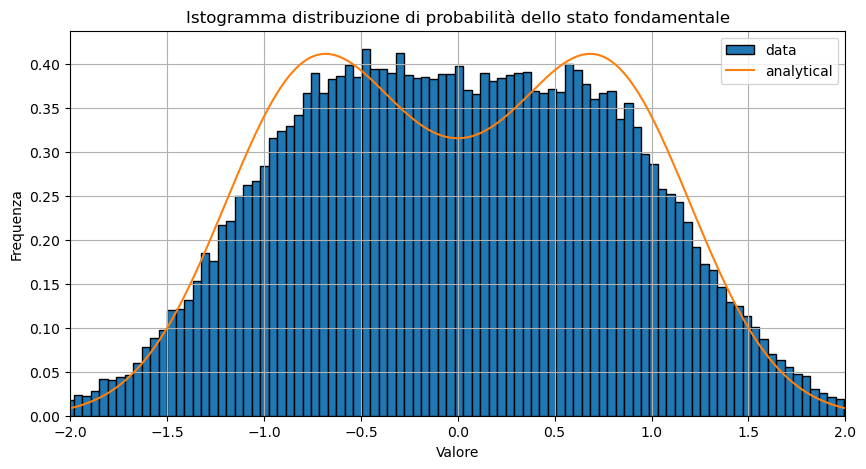

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carica solo la seconda colonna dei dati
data = np.loadtxt('psi_squared.dat', usecols=0)

# Definizione delle funzioni wave, norm e wave2
def wave(x):
    return (np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-(x+mu)**2)/(2*sigma**2)))

def norm(mu, sigma):
    return 2 * (1 + np.exp(-mu**2/sigma**2)) * np.sqrt(np.pi) * abs(sigma)

def wave2(x, mu, sigma):
    return wave(x)**2 / norm(mu, sigma)

# Parametri mu e sigma
mu = -0.780447
sigma = 0.627525

# Range di x per il plot
x = np.linspace(-5, 5, 1000)

# Creazione del plot
plt.figure(figsize=(10, 5))
plt.hist(data, bins=200, edgecolor='black', density=True, label='data')  # Plot dell'istogramma con i dati della seconda colonna
plt.plot(x, wave2(x, mu, sigma), label='analytical')  # Plot della curva analitica
plt.xlim(-2, 2)
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.title('Istogramma distribuzione di probabilità dello stato fondamentale')
plt.legend()
plt.grid(True)
plt.show()

